In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [285]:
df=pd.read_csv('/home/astro/Downloads/adult.csv')

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [287]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [288]:
df=df.replace('?',None)

In [289]:
df.isnull().sum().sort_values()

age                  0
fnlwgt               0
education            0
education.num        0
relationship         0
marital.status       0
sex                  0
race                 0
hours.per.week       0
income               0
capital.gain         0
capital.loss         0
native.country     583
workclass         1836
occupation        1843
dtype: int64

In [290]:
df.dropna(inplace=True)

In [291]:
df.isnull().sum().sort_values()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [292]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [293]:
df.reset_index(drop=True,inplace=True)

In [294]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


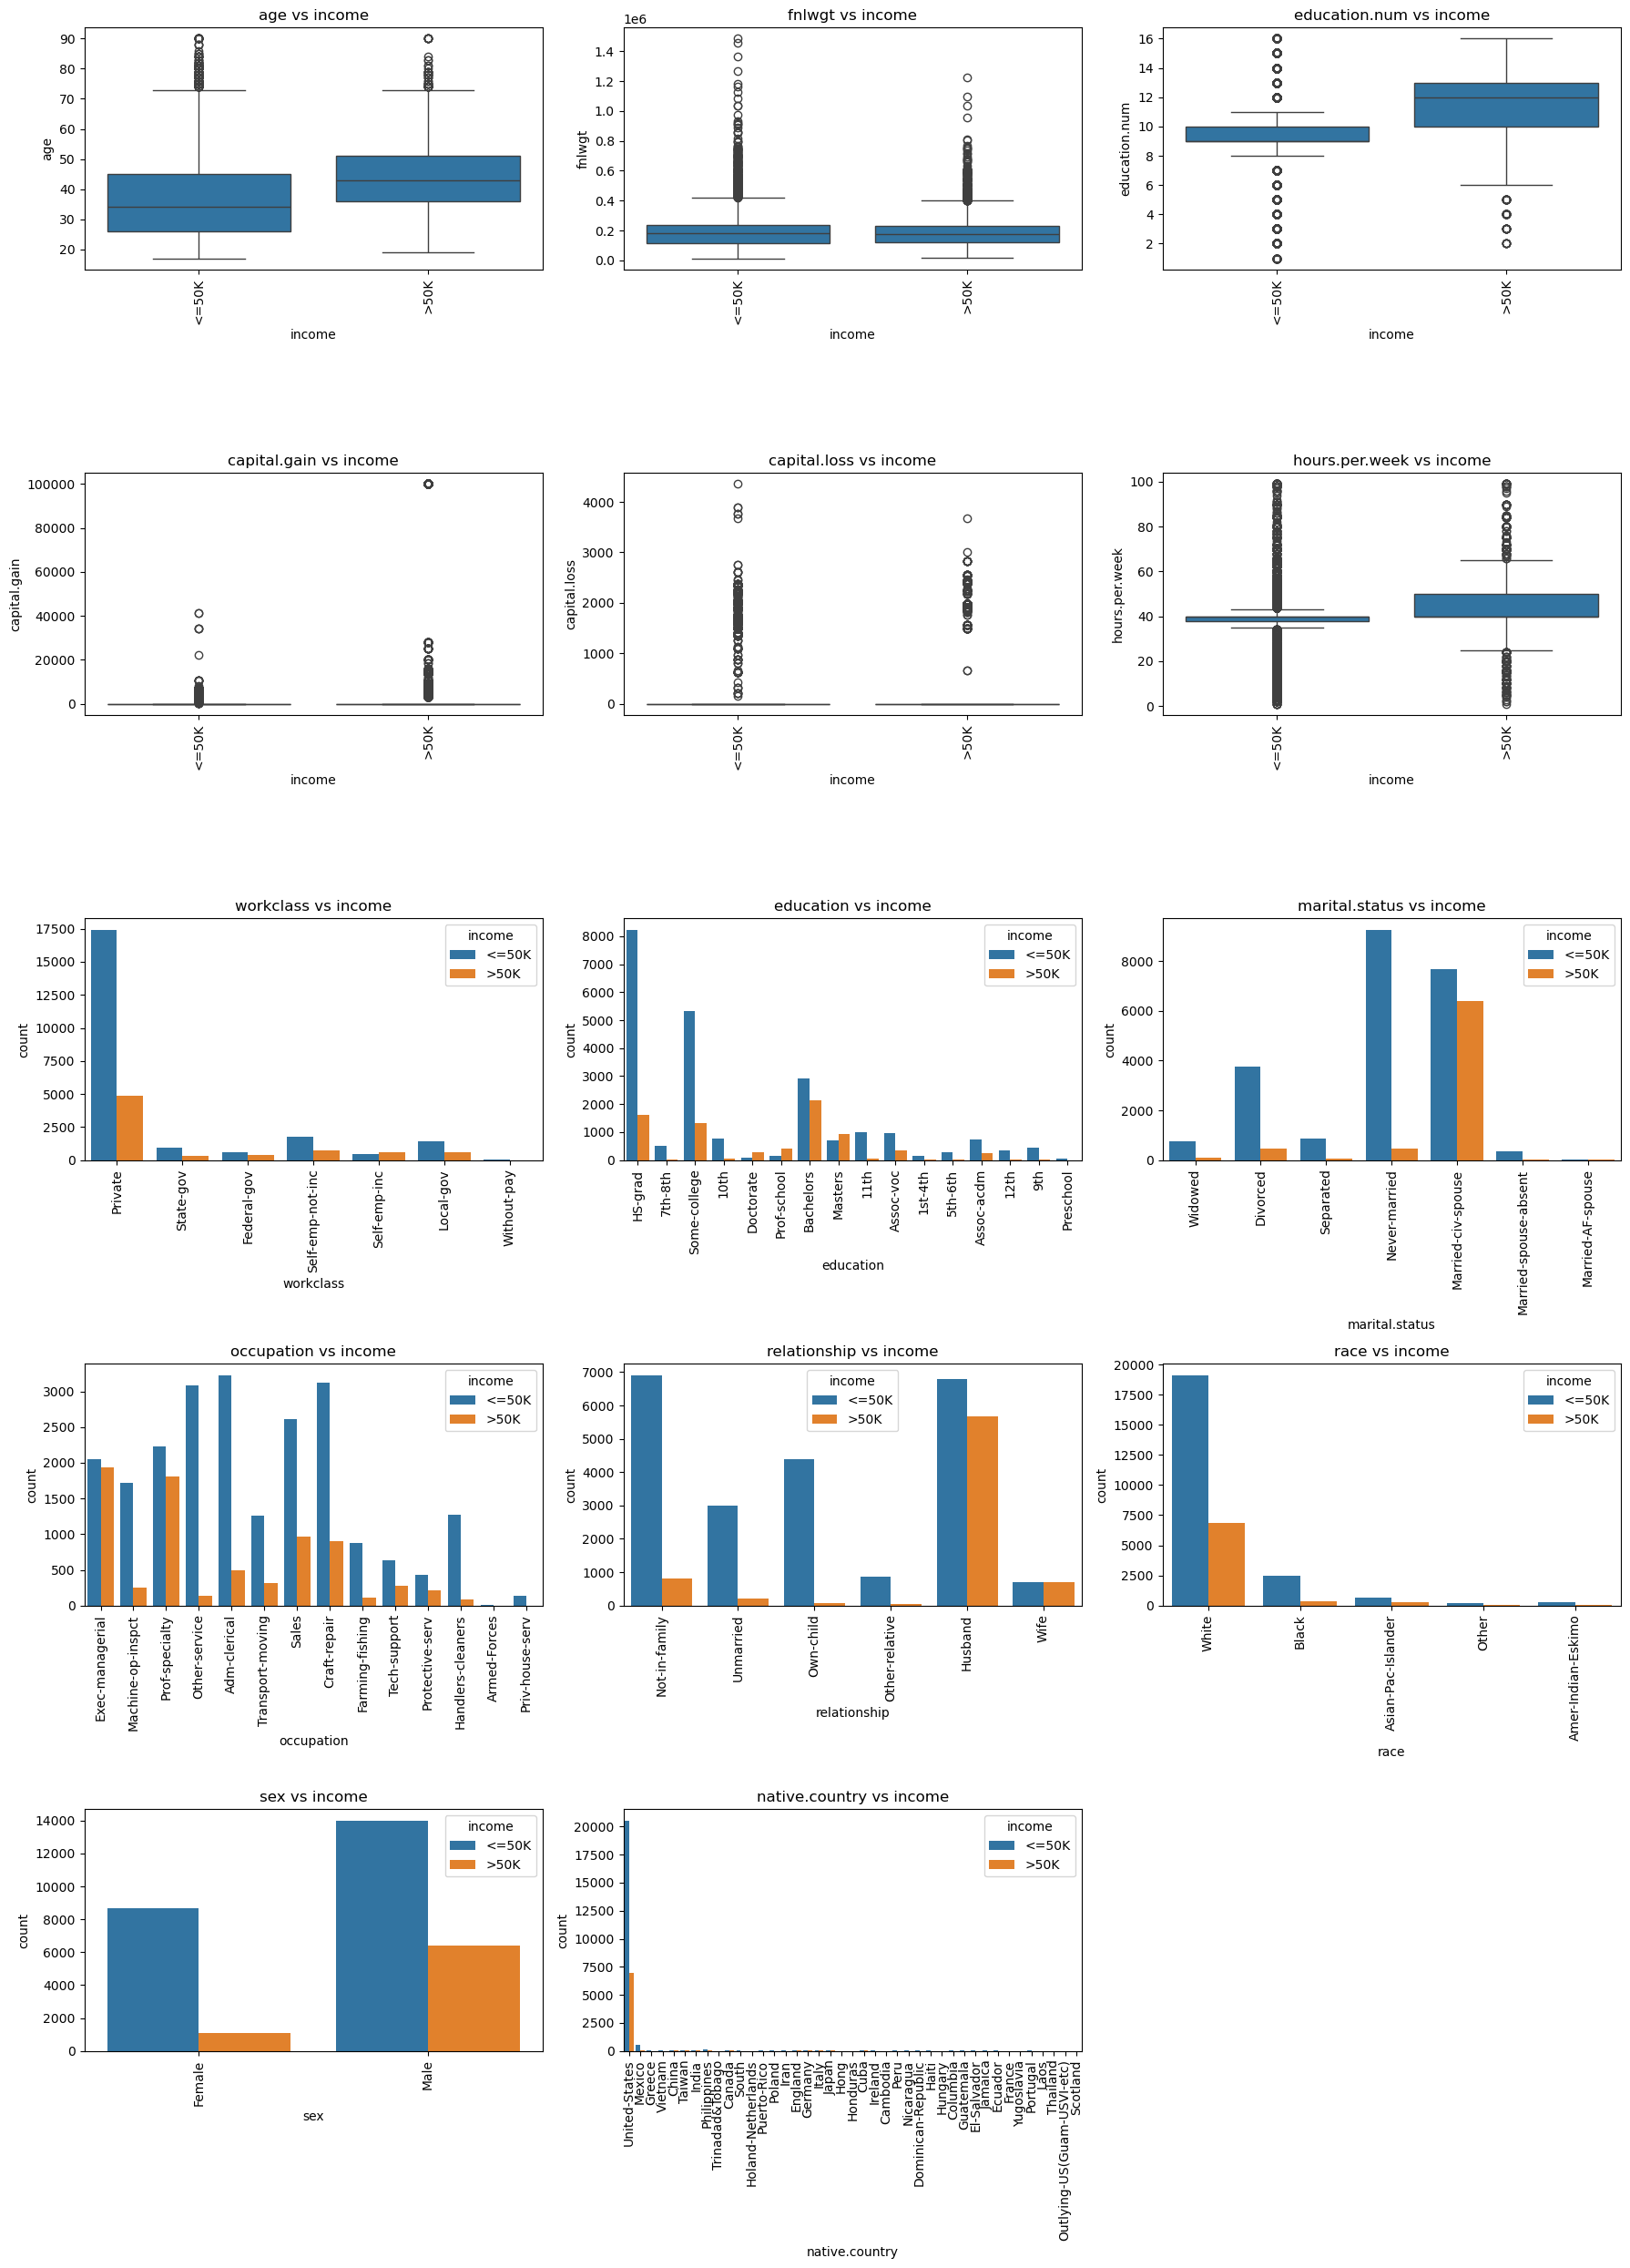

In [295]:
target = 'income'

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target, errors='ignore')
categorical_cols = df.select_dtypes(include=['object']).columns.drop(target)

total_plots = len(numeric_cols) + len(categorical_cols)
cols = 3
rows = (total_plots + cols - 1) // cols

plt.figure(figsize=(18, rows * 5))

plot_num = 1

for col in numeric_cols:
    plt.subplot(rows, cols, plot_num)
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'{col} vs income')
    plot_num += 1
    plt.xticks(rotation = 90)

for col in categorical_cols:
    plt.subplot(rows, cols, plot_num)
    sns.countplot(data=df, x=col, hue=target)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs income')
    plot_num += 1
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [296]:
for col in df.columns:
    print(col,df[col].unique(),'\n')

age [82 54 41 34 38 74 68 45 52 32 46 57 37 29 61 51 21 33 49 23 59 60 63 53
 44 43 48 71 73 40 50 42 39 55 47 31 58 62 36 67 72 78 83 26 70 27 35 81
 66 65 25 28 56 69 20 30 90 24 64 75 19 77 22 80 18 17 79 76 88 84 85 86] 

workclass ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay'] 

fnlwgt [132870 140359 264663 ...  84661 257302 201490] 

education ['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool'] 

education.num [ 9  4 10  6 16 15 13 14  7 11  2  3 12  8  5  1] 

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation ['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Fo

In [297]:
df['income']=df['income'].map({'<=50K':0,">50K":1})

In [298]:
from category_encoders import TargetEncoder

In [299]:
target=TargetEncoder(cols=['workclass','education','occupation','native.country'])

In [300]:
encoding_data=target.fit_transform(df[['workclass','education','occupation','native.country']],df['income'])

In [301]:
encoding_data

,workclass,education,occupation,native.country
0,0.218792,0.164329,0.485220,0.254327
1,0.218792,0.062837,0.124619,0.254327
2,0.218792,0.200060,0.448489,0.254327
3,0.218792,0.164329,0.041096,0.254327
4,0.218792,0.071951,0.133835,0.254327
...,...,...,...,...
30157,0.218792,0.200060,0.326087,0.254327
30158,0.218792,0.253968,0.304825,0.254327
30159,0.218792,0.164329,0.124619,0.254327
30160,0.218792,0.164329,0.133835,0.254327


In [302]:
df[['workclass','education','occupation','native.country']]=encoding_data

In [303]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,0.218792,132870,0.164329,9,Widowed,0.485220,Not-in-family,White,Female,0,4356,18,0.254327,0
1,54,0.218792,140359,0.062837,4,Divorced,0.124619,Unmarried,White,Female,0,3900,40,0.254327,0
2,41,0.218792,264663,0.200060,10,Separated,0.448489,Own-child,White,Female,0,3900,40,0.254327,0
3,34,0.218792,216864,0.164329,9,Divorced,0.041096,Unmarried,White,Female,0,3770,45,0.254327,0
4,38,0.218792,150601,0.071951,6,Separated,0.133835,Unmarried,White,Male,0,3770,40,0.254327,0


In [304]:
from sklearn.preprocessing import LabelEncoder

In [305]:
le=LabelEncoder()

In [306]:
df['sex']=le.fit_transform(df['sex'])

In [307]:
df=pd.get_dummies(df)

In [308]:
df=df.astype(int)

In [309]:
df.head()

,age,workclass,fnlwgt,education,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,82,0,132870,0,9,0,0,0,4356,18,...,1,0,0,0,0,0,0,0,0,1
1,54,0,140359,0,4,0,0,0,3900,40,...,0,0,0,1,0,0,0,0,0,1
2,41,0,264663,0,10,0,0,0,3900,40,...,0,0,1,0,0,0,0,0,0,1
3,34,0,216864,0,9,0,0,0,3770,45,...,0,0,0,1,0,0,0,0,0,1
4,38,0,150601,0,6,0,1,0,3770,40,...,0,0,0,1,0,0,0,0,0,1


In [310]:
df.shape

(30162, 30)

In [311]:
df=df.drop('capital.loss',axis=1)

In [312]:


# Q1=df.quantile(0.25)
# Q3=df.quantile(0.75)

# IQR=Q3-Q1
# lower=Q1-1.5*IQR
# upper=Q3+1.5*IQR

# df[numeric_cols]=np.clip(df[numeric_cols],lower,upper,axis=1)

In [313]:
X=df.drop('income',axis=1)
y=df['income']

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=.2,shuffle=True)

In [316]:
from sklearn.preprocessing import RobustScaler

In [317]:
rob=RobustScaler()

In [318]:
X_train[['age','fnlwgt','hours.per.week','capital.gain']]=rob.fit_transform(X_train[['age','fnlwgt','hours.per.week','capital.gain']])

In [319]:
X_test[['age','fnlwgt','hours.per.week','capital.gain']]=rob.transform(X_test[['age','fnlwgt','hours.per.week','capital.gain']])

In [320]:
from models import run_classification_models,classifications_models


selected_keys = ['KNN','BernoulliNB','LogisticRegression','GaussianNB']
selected_models = {}

for key in selected_keys:
    selected_models[key] = classifications_models[key]

result = run_classification_models(selected_models, X_train, X_test, y_train, y_test)

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _ch

In [321]:
result

,model,train_acc,test_acc,train_f1,test_f1
0,KNN,0.882921,0.829438,0.880794,0.826135
2,LogisticRegression,0.795143,0.784684,0.806804,0.796873
3,GaussianNB,0.756061,0.741588,0.771581,0.758251
1,BernoulliNB,0.725227,0.712581,0.743100,0.731592


In [322]:
selected_keys = ['SVM']
selected_models = {}

for key in selected_keys:
    selected_models[key] = classifications_models[key]

result = run_classification_models(selected_models, X_train, X_test, y_train, y_test)

In [323]:
result

,model,train_acc,test_acc,train_f1,test_f1
0,SVM,0.793526,0.791149,0.734957,0.730508



model	train_acc	test_acc	train_f1	test_f1
0	KNN	0.882921	0.829438	0.880794	0.826135
2	LogisticRegression	0.795143	0.784684	0.806804	0.796873
3	GaussianNB	0.756061	0.741588	0.771581	0.758251
1	BernoulliNB	0.725227	0.712581	0.743100	0.731592